In [1]:
# Loading libraries
%matplotlib inline
import os
import os.path
from netCDF4 import Dataset
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc 
import fnmatch
from cycler import cycler
import pandas as pd
from pandas import read_csv, to_datetime, DataFrame
import datetime
import time
import matplotlib.dates as mdates

from matplotlib.path import Path
from matplotlib.patches import PathPatch
from mpl_toolkits.basemap import Basemap # Basemap pour les cartes

In [2]:
# LOADING GRID FILE AND VARIABLES
!pwd
grid_file = '../DATA/grille.nc' 
print 'file exist:', os.path.isfile(grid_file)

f = Dataset(grid_file) # open netcdf
# extracting variables
lon_t = f.variables['longitude_t'][:] # extracting lon data
lat_t = f.variables['latitude_t'][:] # extracting lat data
depth_t = f.variables['depth_t'][:]
bathy = f.variables['h_w'][:]
print 'Bathy :', np.shape(bathy), 'max :', np.max(bathy), 'min :', np.min(bathy)

f.close()

new_bath = np.ma.masked_where(bathy<200, bathy)

/home/dosa/MON_ENV_PYTHON/IAV
file exist: True
Bathy : (160, 394) max : 5054.49 min : 20.5226


In [3]:
# Looking at high IAV zones: 1) loading data
IAV_1 = './IAV_2011.nc'

print 'file exist:', os.path.isfile(IAV_1)

f = Dataset(IAV_1) # open netcdf
IAV_GPP = f.variables['stand_IAV_ppb'][0,:,:]# extracting data
IAV_NetPP = f.variables['stand_IAV_netppb'][0,:,:]# extracting data
IAV_NCP = f.variables['stand_IAV_ppb_res'][0,:,:]# extracting data
IAV_exp_doc200 = f.variables['stand_IAV_exp_doc200'][0,:,:]# extracting data
IAV_exp_poc200 = f.variables['stand_IAV_exp_poc200'][0,:,:]# extracting data

f.close()

file exist: True


END of CELL


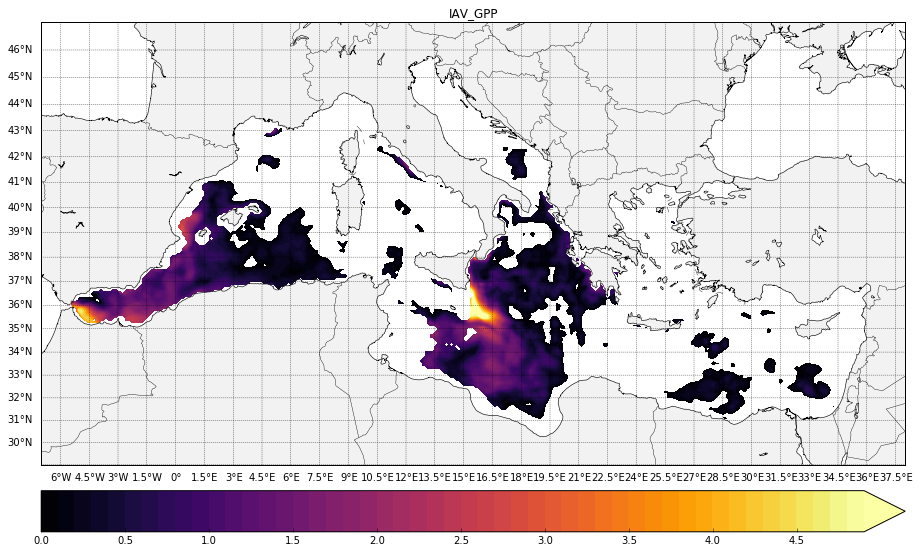

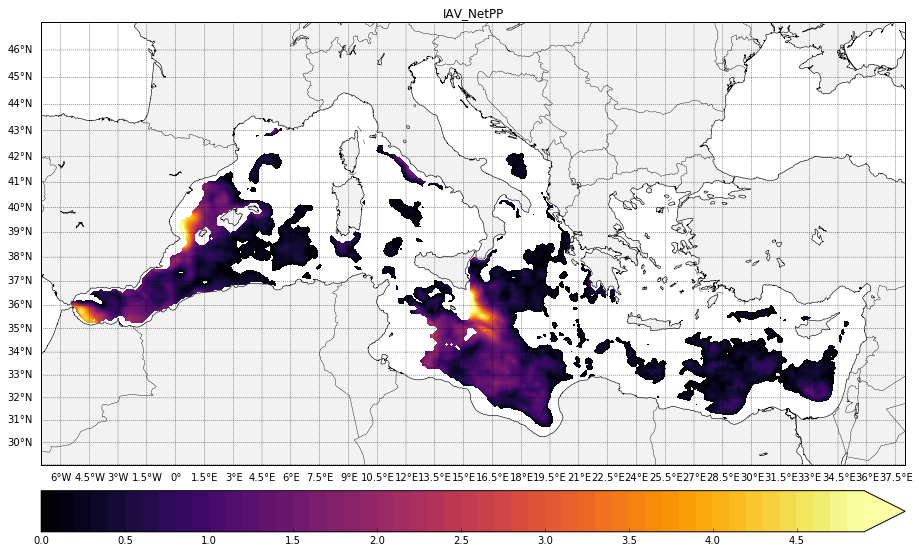

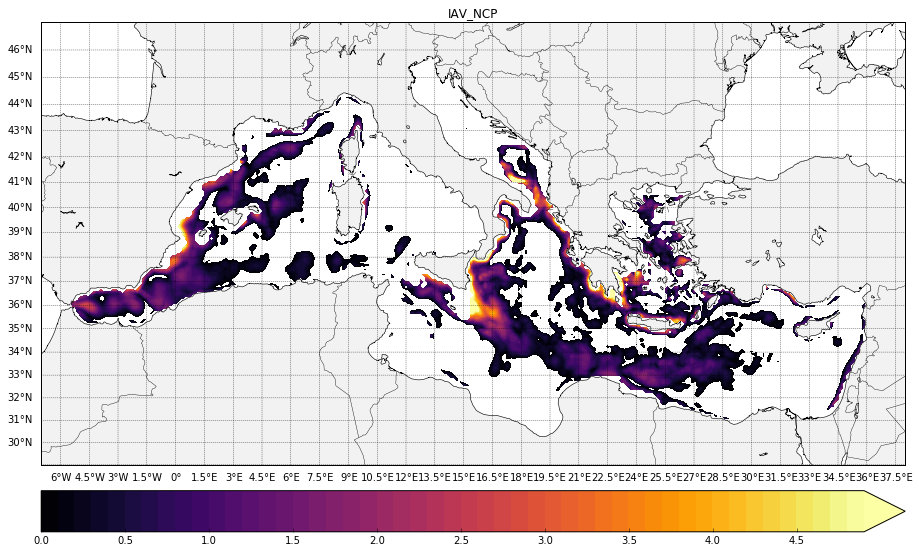

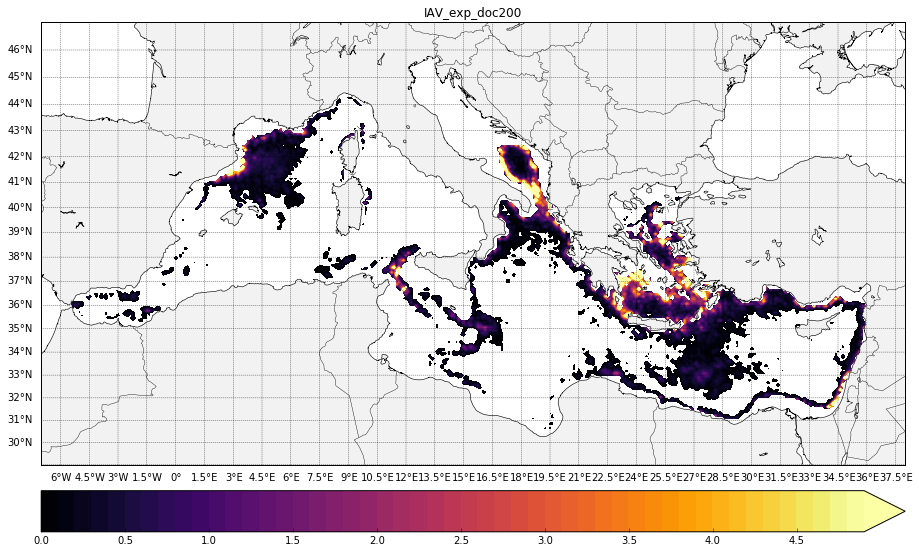

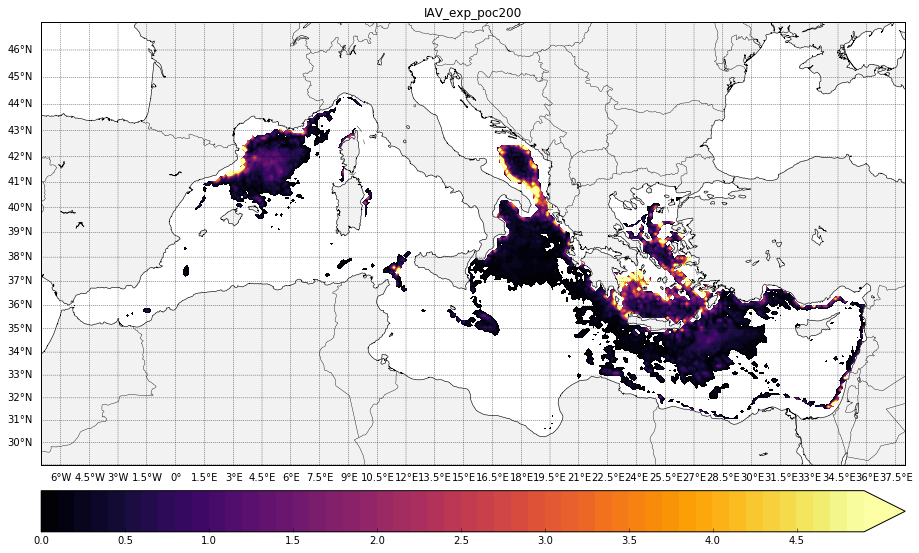

In [106]:
var_list = ['GPP', 'NetPP', 'NCP', 'exp_doc200', 'exp_poc200']

for var in var_list:
    x1,x2,y1,y2 = -7, 38, 29, 47;
    m = Basemap(resolution='i',projection='merc', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=(x1+x2)/2);
    fig = plt.figure(figsize=(15,15));
    ax = fig.add_axes([0.1,0.1,0.8,0.8]);
    m.drawcountries(linewidth=0.4);
    m.drawcoastlines(linewidth=0.6);
    m.fillcontinents(color='0.95',lake_color='white');
    parallels = np.arange(0.,81,1);
    m.drawparallels(parallels,labels=[True,False,True,False],linewidth=0.4);
    meridians = np.arange(-6.,351.,1.5);
    m.drawmeridians(meridians,labels=[True,False,False,True],linewidth=0.4);

    # Creating corresponding variable names
    data_to_plot = np.ma.masked_where(bathy<200,vars()['IAV_'+var]) #np.ma.masked_where(bathy<200,vars()[biovar+'_'+phyvar])
    #data_to_plot = np.ma.masked_where(lon_t<-5.5,data_to_plot)

    # doing a map # Données
    xd,yd = m(lon_t,lat_t);
    levels = np.arange(0,5,0.1);
    #levels2 = np.arange(-1,1.1,0.2);
    #CS1 = m.contour(xd,yd,data_to_plot,levels=levels2,linewidths=0.2,colors='k');
    cs = m.contourf(xd,yd,data_to_plot,levels=levels,cmap=plt.cm.inferno,extend='max');# binary / RdYlGn_r ,levels=levels levels=levels,
    plt.colorbar(cs, orientation='horizontal', pad = 0.03)
    plt.title('IAV_'+var)
    #plt.savefig('/home/dosa/THESE/CR_reunions/JULY_FIGS/IAV_CORR_MAPS/IAV_'+var+'.png',bbox_inches='tight',format='png')

print 'END of CELL'

In [5]:
#var_bio = ['ppb', 'netppb', 'export_poc200', 'export_doc200', 'export_nit_sw', 'export_nit_iw', 'chlsurf'] 
var_bio = ['ppb', 'ppb-resp', 'netppb', 'export_poc200', 'export_doc200', 'export_nit_sw', 'export_nit_iw', 'chlsurf'] # new vers
#var_phy = ['snsf', 'ssr', 'sst', 'stra', 'mld']
var_phy = ['snsf', 'ssr', 'sst', 'str2', 'strf', 'mld'] # new vers

#correl_1 = './CORREL_1_2012.nc' 
correl_1 = './CORREL_1_2011.nc' # new vers
print 'file exist:', os.path.isfile(correl_1)

f = Dataset(correl_1) # open netcdf
for phyvar in var_phy:
    for biovar in var_bio:
        if biovar == 'ppb-resp':
            vars()['NCP_'+phyvar] = f.variables[biovar+phyvar][0,:,:]# extracting data
        else:
            vars()[biovar+'_'+phyvar] = f.variables[biovar+'_'+phyvar][0,:,:]# extracting data
#ppb_snsf = f.variables['ppb_snsf'][0,:,:] # extracting data

f.close()

np.shape(netppb_mld) # (160, 394) seems ok!

# STOP REMOVING NON SIGNIF
        
print 'END of CELL'

file exist: True
END of CELL


In [ ]:
# Removing non significant values
for phyvar in var_phy:
    for biovar in var_bio:
        if biovar == 'ppb-resp':
            vars()['NCP_'+phyvar][(vars()['NCP_'+phyvar]>-0.33)&(vars()['NCP_'+phyvar]<0.33)] = np.nan
        else:
            vars()[biovar+'_'+phyvar][(vars()[biovar+'_'+phyvar]>-0.33)&(vars()[biovar+'_'+phyvar]<0.33)] = np.nan

In [81]:
# Correlations between forcings
#correl_forcing = './CORREL_FORCING_2012.nc'
correl_forcing = './CORREL_FORCING_2011.nc' # new vers
print 'file exist:', os.path.isfile(correl_forcing)

f = Dataset(correl_forcing) # open netcdf
snsf_ssr = f.variables['correl_snsf_ssr'][0,:,:]# extracting data
ssr_strat = f.variables['correl_ssr_strat'][0,:,:]# extracting data
snsf_strat = f.variables['correl_snsf_strat'][0,:,:]# extracting data
snsf_mld = f.variables['correl_snsf_mld'][0,:,:]# extracting data

f.close()

np.shape(snsf_ssr) # (160, 394) seems ok!

file exist: True


(160, 394)

In [87]:
# CORREL_2_2012.nc
var_other = ['bactc', 'chl_tot', 'phyto', 'zoo', 'poc', 'doc']
#var_phy = ['snsf', 'ssr', 'sst', 'stra', 'mld']
var_phy = ['snsf', 'ssr', 'sst', 'strf', 'str2', 'mld'] # new vers

#correl_2 = './CORREL_2_2012.nc' # new vers
correl_2 = './CORREL_2_2011.nc'
print 'file exist:', os.path.isfile(correl_2)

f = Dataset(correl_2) # open netcdf
for phyvar in var_phy:
    for othervar in var_other:
        vars()[othervar+'_'+phyvar] = f.variables[othervar+'_'+phyvar][0,:,:]# extracting data

f.close()

np.shape(chl_tot_snsf) # (160, 394) seems ok!

# Removing non significant values
for phyvar in var_phy:
    for othervar in var_other:
        vars()[othervar+'_'+phyvar][(vars()[othervar+'_'+phyvar]>-0.33)&(vars()[othervar+'_'+phyvar]<0.33)] = np.nan
        
print 'END of CELL'

file exist: True
END of CELL


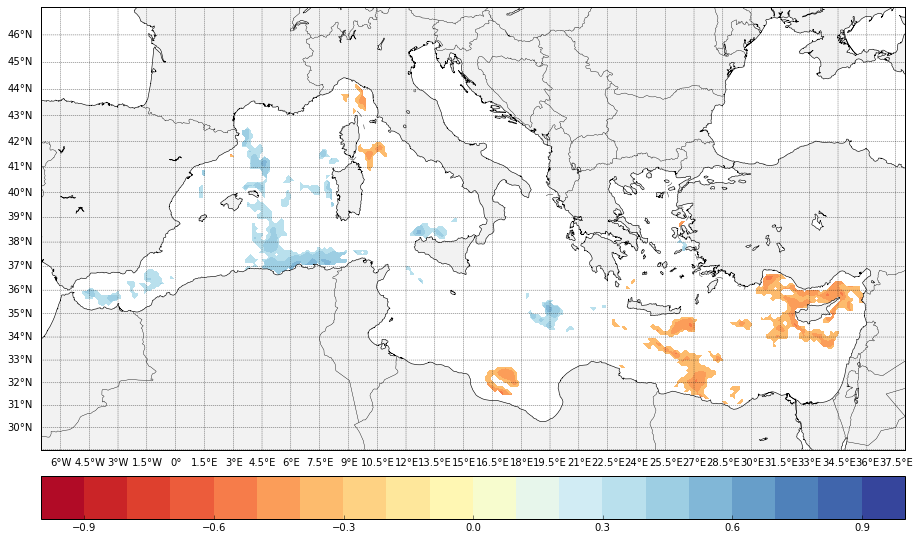

In [39]:
# Example
x1,x2,y1,y2 = -7, 38, 29, 47;
m = Basemap(resolution='i',projection='merc', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=(x1+x2)/2);
            # figure
fig = plt.figure(figsize=(15,15));
ax = fig.add_axes([0.1,0.1,0.8,0.8]);
m.drawcountries(linewidth=0.4);
m.drawcoastlines(linewidth=0.6);
m.fillcontinents(color='0.95',lake_color='white');
parallels = np.arange(0.,81,1);
m.drawparallels(parallels,labels=[True,False,True,False],linewidth=0.4);
meridians = np.arange(-6.,351.,1.5);
m.drawmeridians(meridians,labels=[True,False,False,True],linewidth=0.4);
    
# Creating corresponding variable names
data_to_plot = np.ma.masked_where(bathy<200,ppb_snsf)
data_to_plot = np.ma.masked_where(lon_t<-5.5,data_to_plot)

# doing a map

# Données
xd,yd = m(lon_t,lat_t);
levels = np.arange(-1,1.1,0.1);
levels2 = np.arange(-1,1.1,0.2);
#CS1 = m.contour(xd,yd,data_to_plot,levels=levels2,linewidths=0.2,colors='k');
cs = m.contourf(xd,yd,data_to_plot,levels=levels,cmap=plt.cm.RdYlBu);# binary / jet ,levels=levels

plt.colorbar(cs, orientation='horizontal', pad = 0.03)

In [ ]:
var_bio = ['ppb', 'NCP', 'netppb', 'export_poc200', 'export_doc200', 'export_nit_sw', 'export_nit_iw', 'chlsurf']

for phyvar in var_phy:
    for biovar in var_bio:
        x1,x2,y1,y2 = -7, 38, 29, 47;
        m = Basemap(resolution='i',projection='merc', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=(x1+x2)/2);
                    # figure
        fig = plt.figure(figsize=(12,12));
        ax = fig.add_axes([0.1,0.1,0.8,0.8]);
        m.drawcountries(linewidth=0.4);
        m.drawcoastlines(linewidth=0.6);
        m.fillcontinents(color='0.95',lake_color='white');
        parallels = np.arange(0.,81,1);
        m.drawparallels(parallels,labels=[True,False,True,False],linewidth=0.4);
        meridians = np.arange(-6.,351.,1.5);
        m.drawmeridians(meridians,labels=[True,False,False,True],linewidth=0.4);

        # Creating corresponding variable names
        data_to_plot = np.ma.masked_where(bathy<200,vars()[biovar+'_'+phyvar])
        data_to_plot = np.ma.masked_where(lon_t<-5.5,data_to_plot)

        # doing a map # Données
        xd,yd = m(lon_t,lat_t);
        levels = np.arange(-1,1.1,0.1);
        levels2 = [-0.33,0.33];
        #levels2 = np.arange(-1,1.1,0.2);
        CS1 = m.contour(xd,yd,data_to_plot,levels=levels2,linewidths=0.6,colors='k');
        cs = m.contourf(xd,yd,data_to_plot,levels=levels,cmap=plt.cm.RdYlBu_r);# binary / jet ,levels=levels
        plt.colorbar(cs, orientation='horizontal', pad = 0.03)
        plt.title(biovar+'_'+phyvar)
        plt.savefig('/home/dosa/THESE/CR_reunions/JULY_FIGS/IAV_CORR_MAPS/NEW_TRY/'+biovar+'_'+phyvar+'.png',bbox_inches='tight',format='png')

print 'END of CELL'

END of CELL


/home/dosa/MON_ENV_PYTHON/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in greater
/home/dosa/MON_ENV_PYTHON/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in less


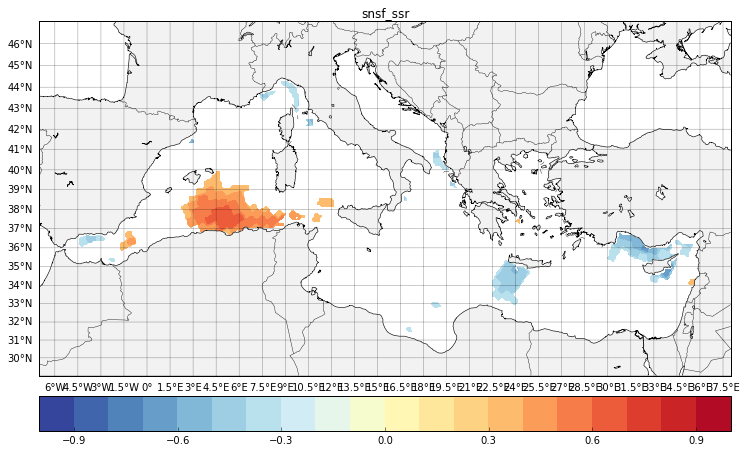

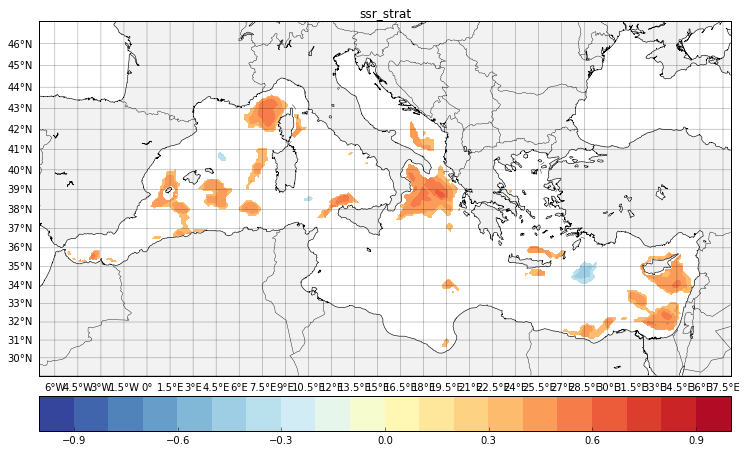

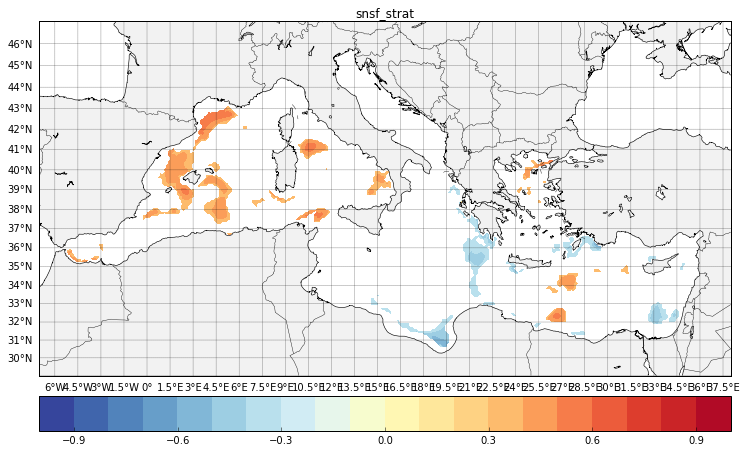

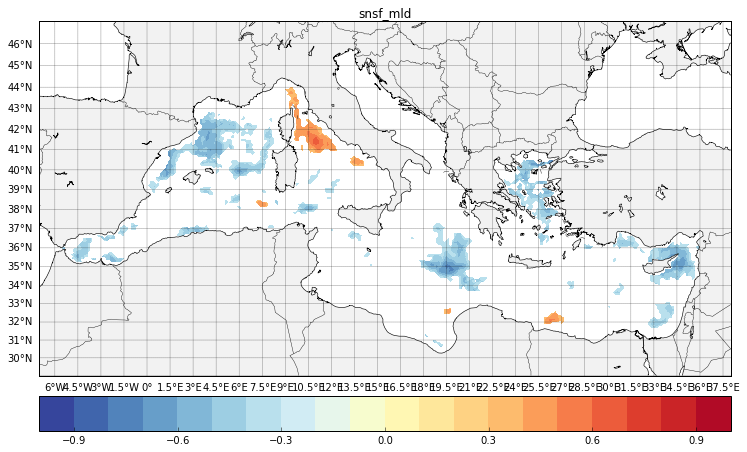

In [83]:
# CORRELATION_FORCING
forcing_corr_list = ['snsf_ssr','ssr_strat','snsf_strat','snsf_mld']

for forcing_corr in forcing_corr_list:
    vars()[forcing_corr][(vars()[forcing_corr]>-0.33)&(vars()[forcing_corr]<0.33)] = np.nan
    
    x1,x2,y1,y2 = -7, 38, 29, 47;
    m = Basemap(resolution='i',projection='merc', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=(x1+x2)/2);
                    # figure
    fig = plt.figure(figsize=(12,12));
    ax = fig.add_axes([0.1,0.1,0.8,0.8]);
    m.drawcountries(linewidth=0.4);
    m.drawcoastlines(linewidth=0.6);
    m.fillcontinents(color='0.95',lake_color='white');
    parallels = np.arange(0.,81,1);
    m.drawparallels(parallels,labels=[True,False,True,False],linewidth=0.4);
    meridians = np.arange(-6.,351.,1.5);
    m.drawmeridians(meridians,labels=[True,False,False,True],linewidth=0.4);

    # Creating corresponding variable names
    data_to_plot = np.ma.masked_where(bathy<200,vars()[forcing_corr])
    data_to_plot = np.ma.masked_where(lon_t<-5.5,data_to_plot)

    # doing a map # Données
    xd,yd = m(lon_t,lat_t);
    levels = np.arange(-1,1.1,0.1);
    #levels2 = np.arange(-1,1.1,0.2);
    #CS1 = m.contour(xd,yd,data_to_plot,levels=levels2,linewidths=0.2,colors='k');
    cs = m.contourf(xd,yd,data_to_plot,levels=levels,cmap=plt.cm.RdYlGn_r);# binary / jet / RdYlGn ,levels=levels 
    plt.colorbar(cs, orientation='horizontal', pad = 0.03)
    plt.title(forcing_corr)
    plt.savefig('/home/dosa/THESE/CR_reunions/JULY_FIGS/IAV_CORR_MAPS/'+forcing_corr+'2.png',bbox_inches='tight',format='png')

print 'END of CELL'

END of CELL


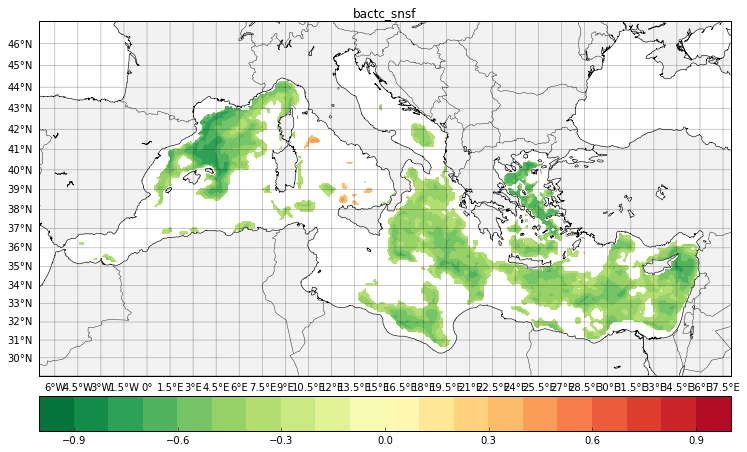

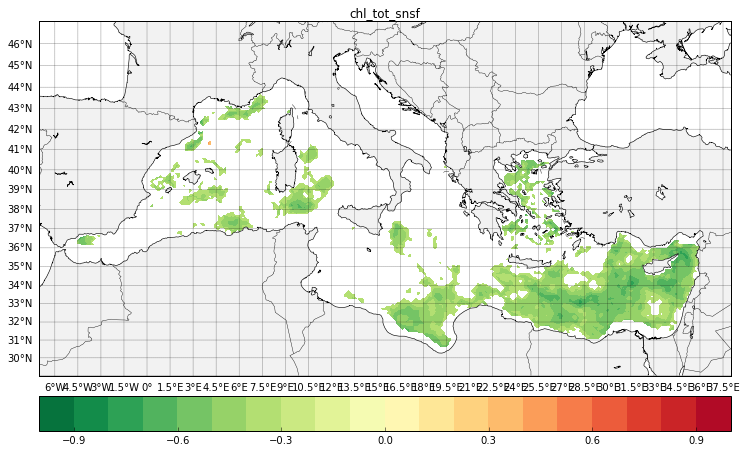

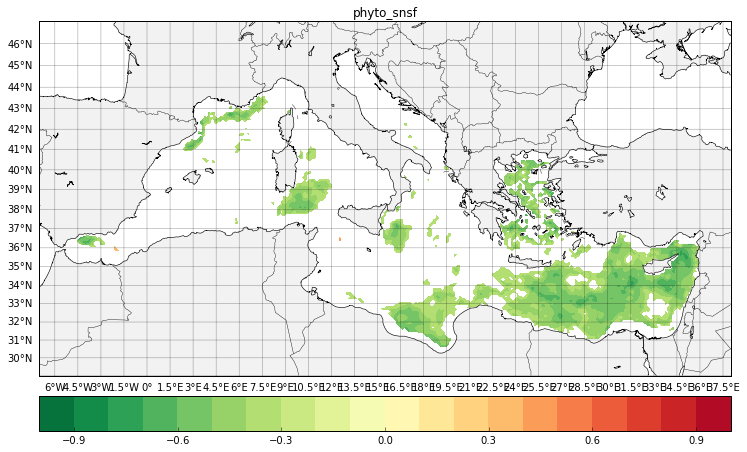

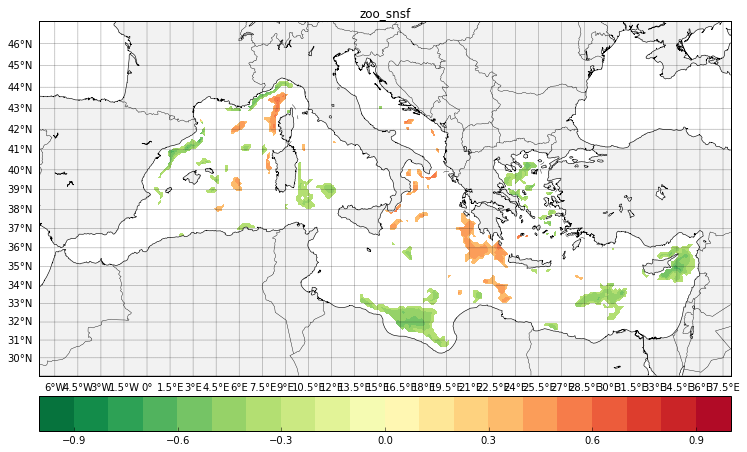

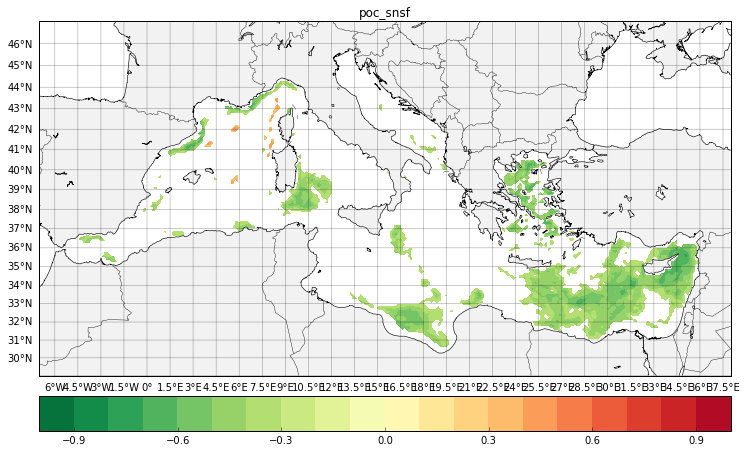

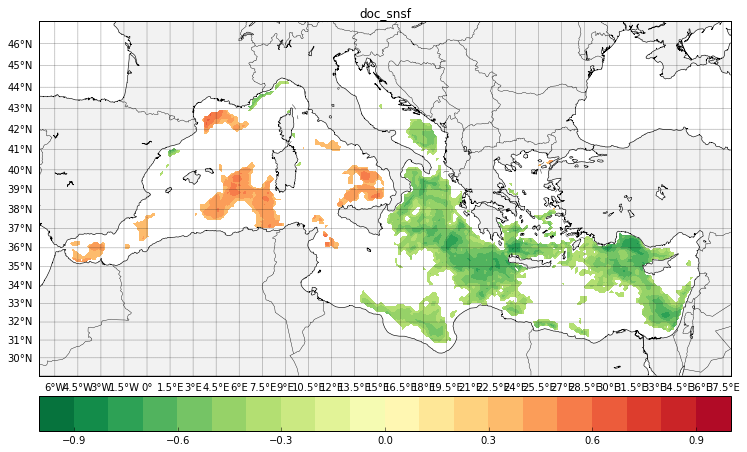

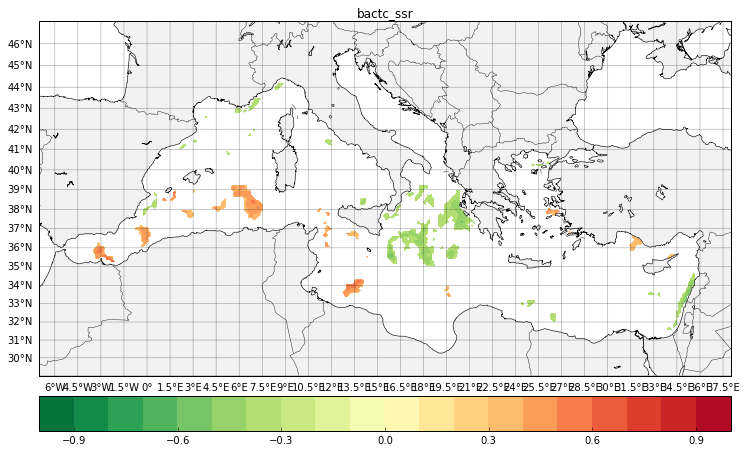

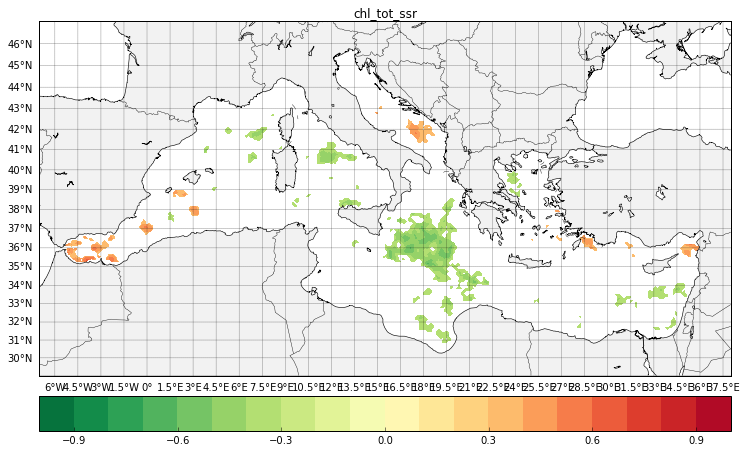

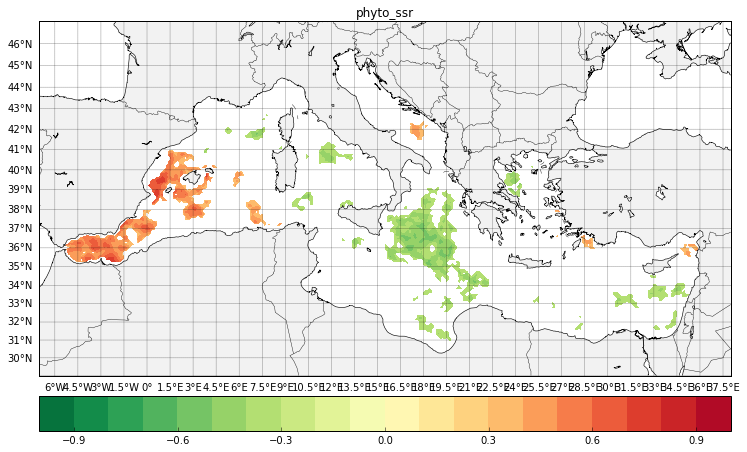

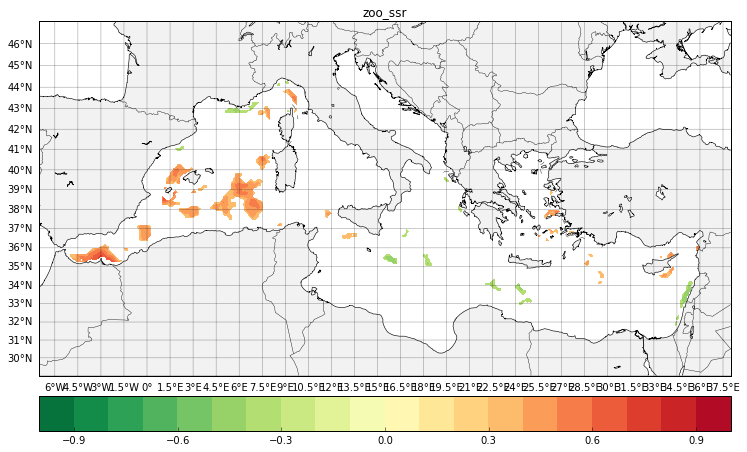

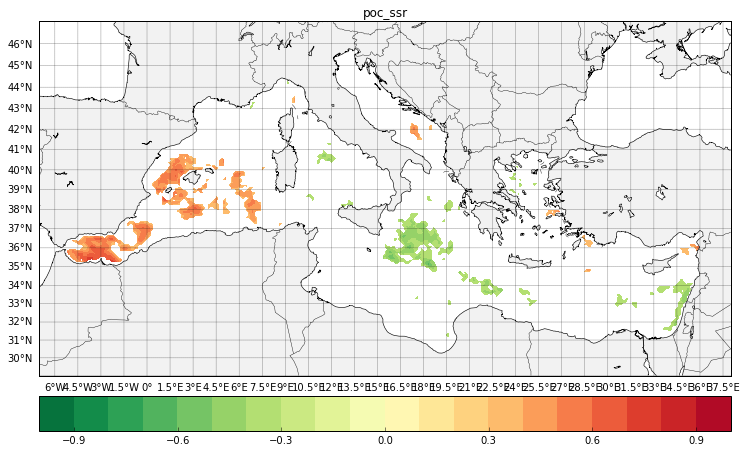

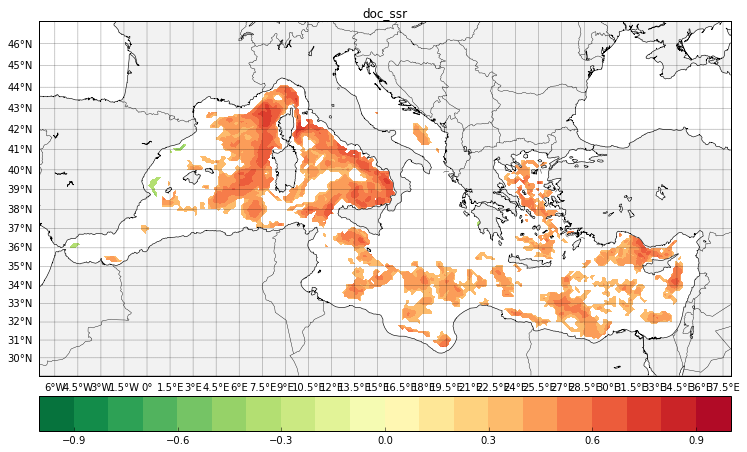

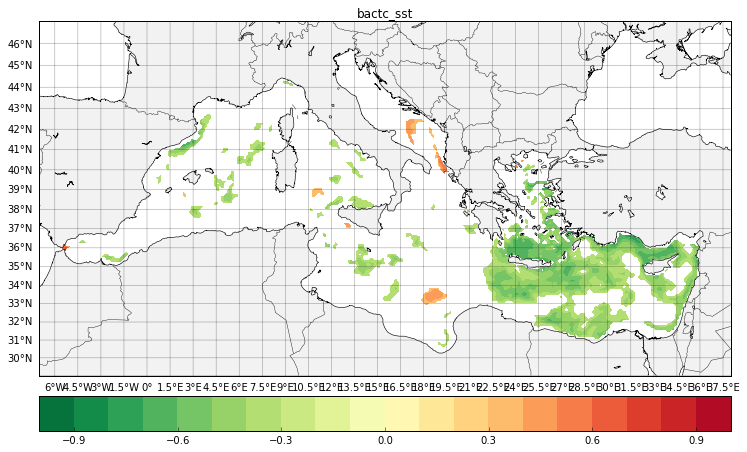

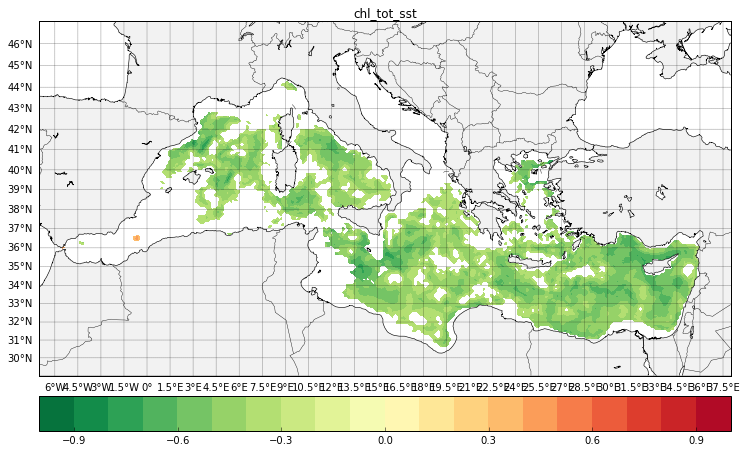

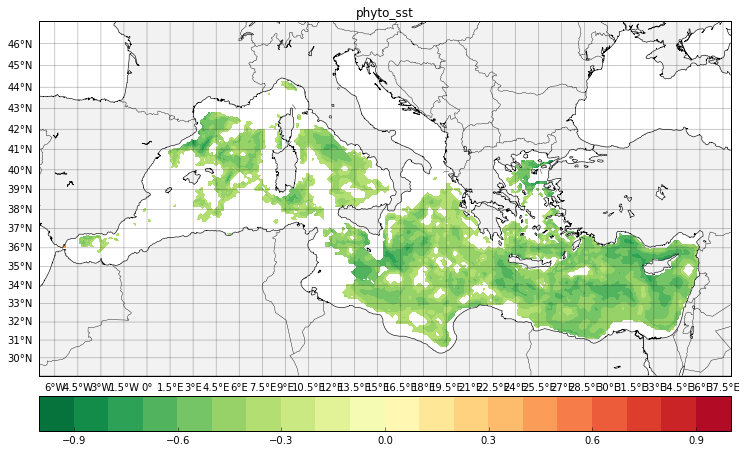

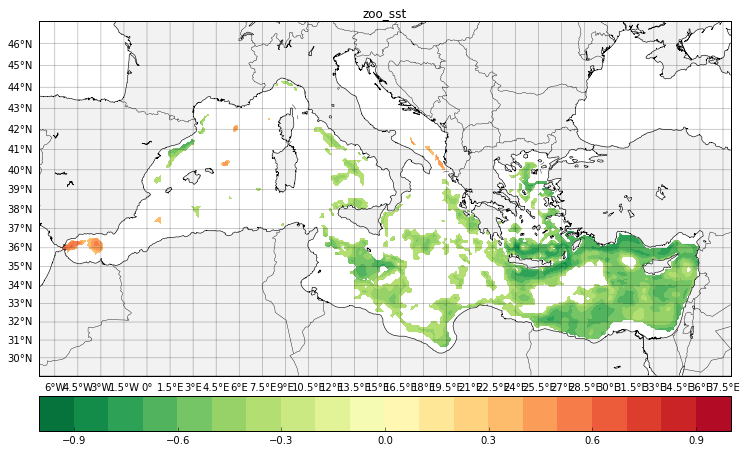

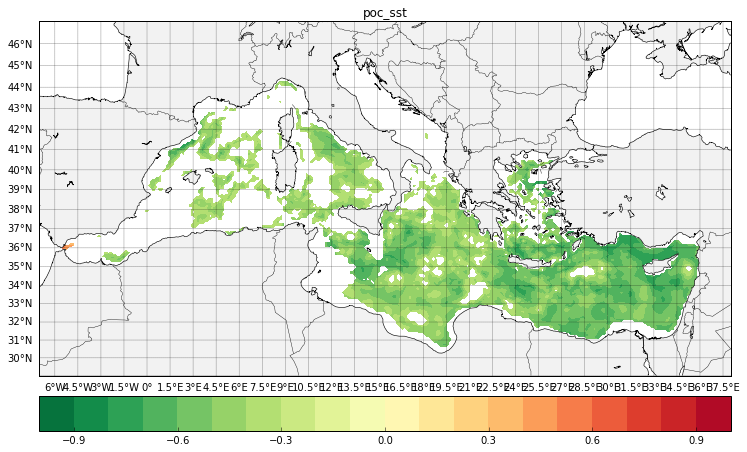

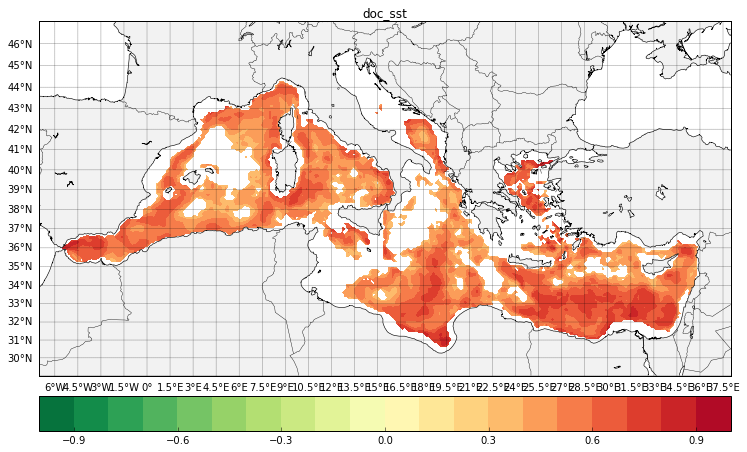

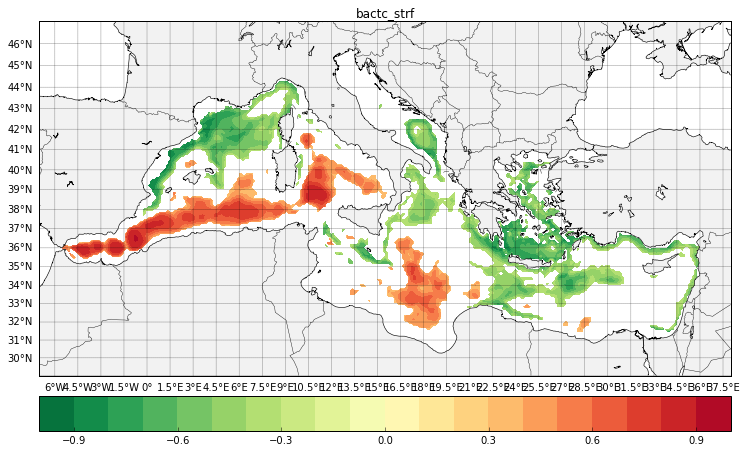

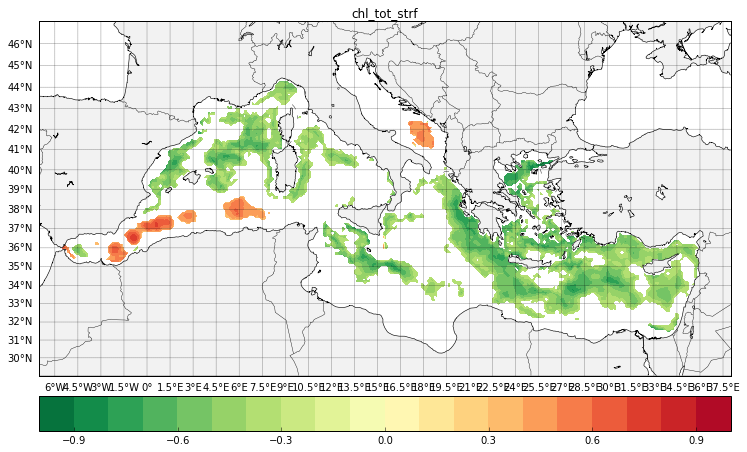

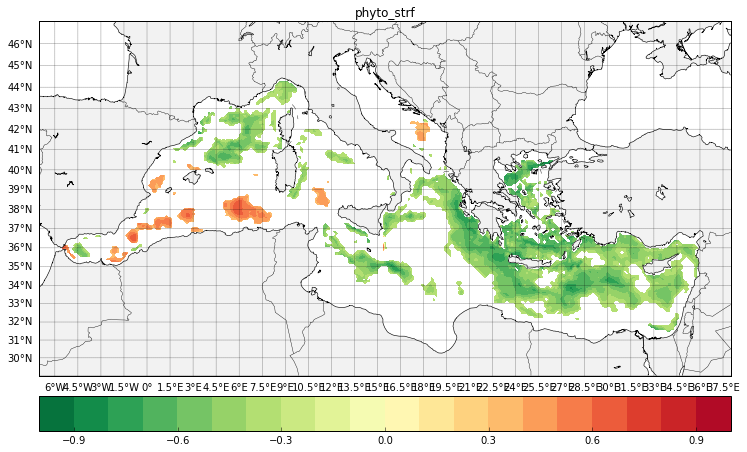

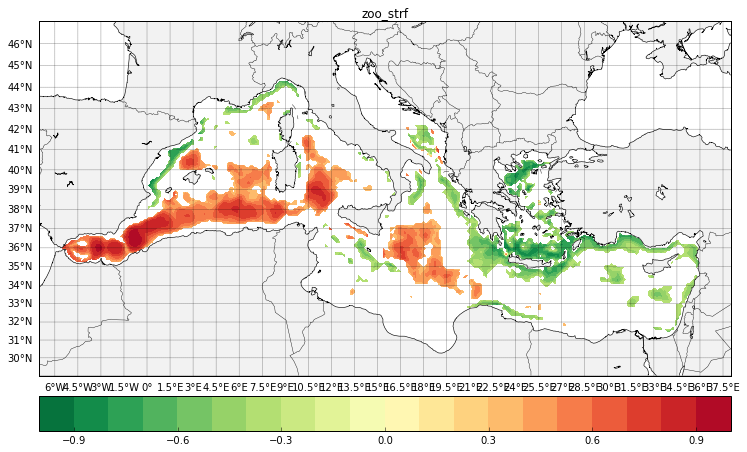

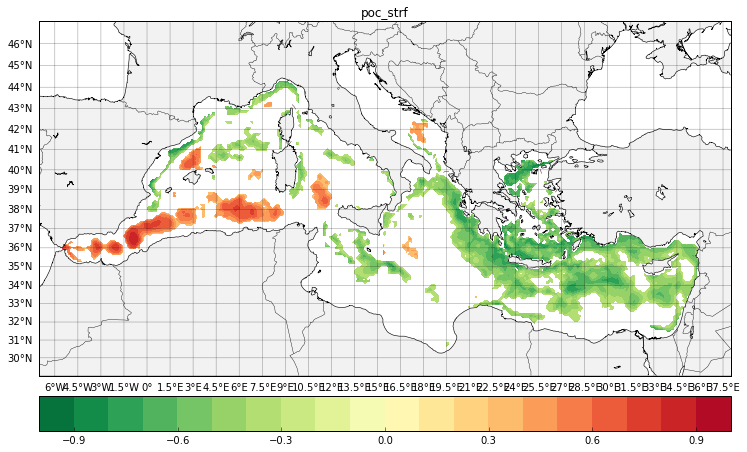

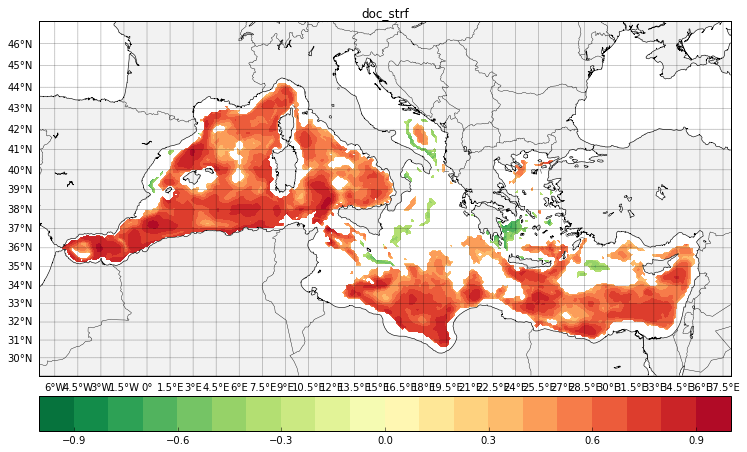

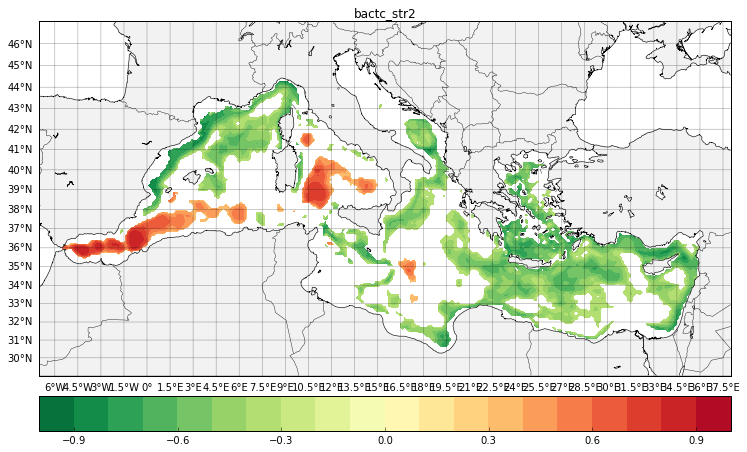

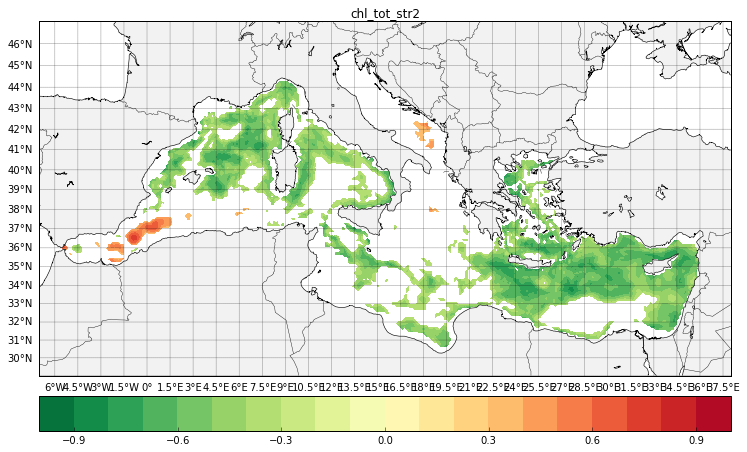

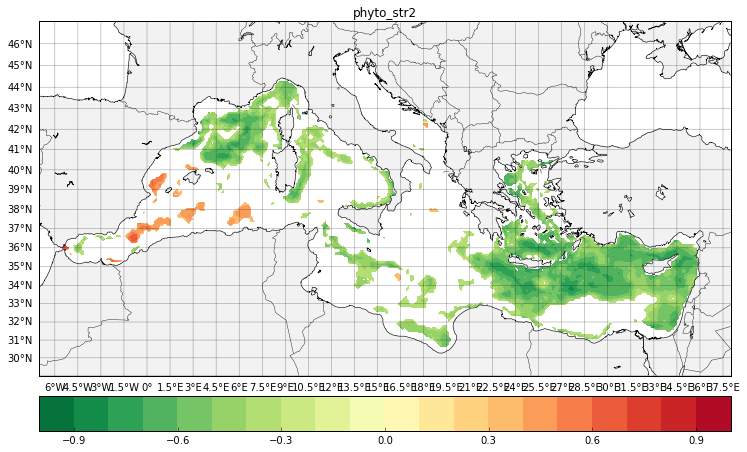

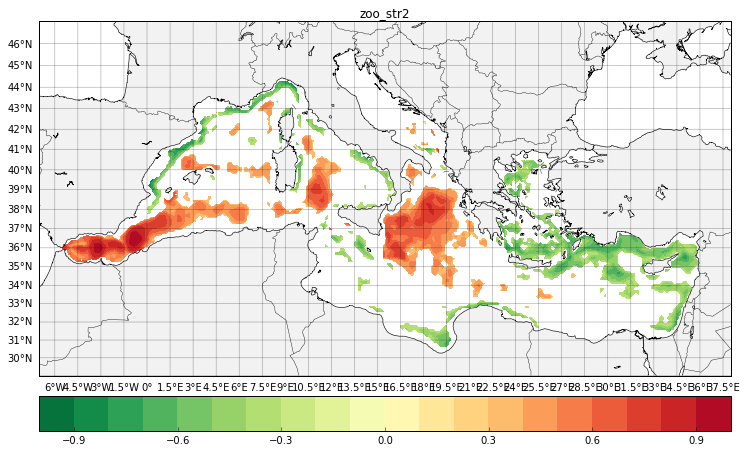

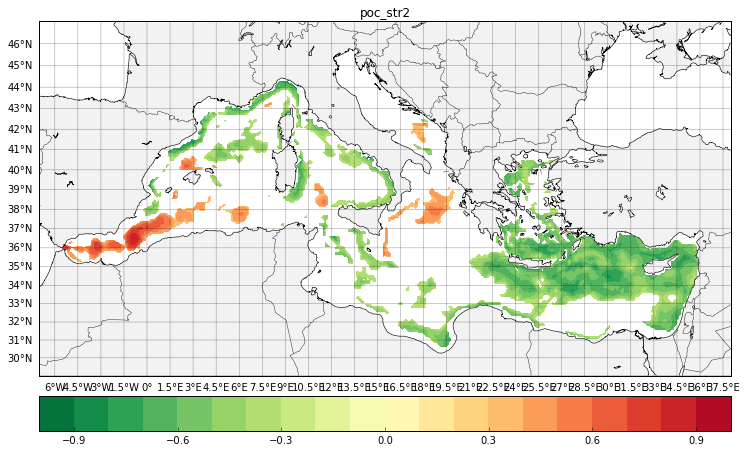

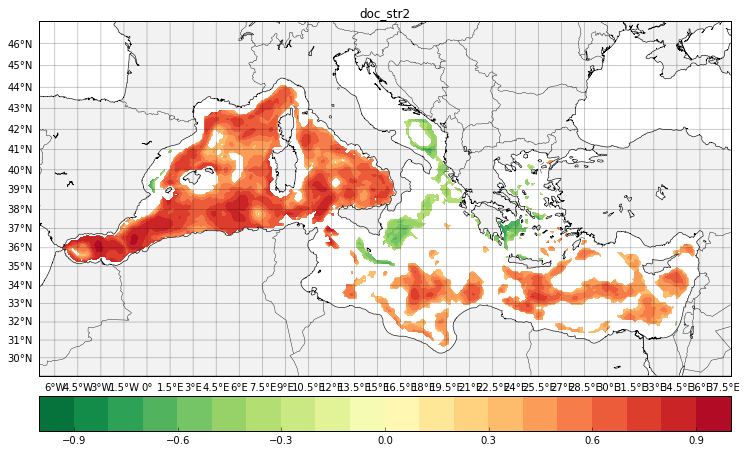

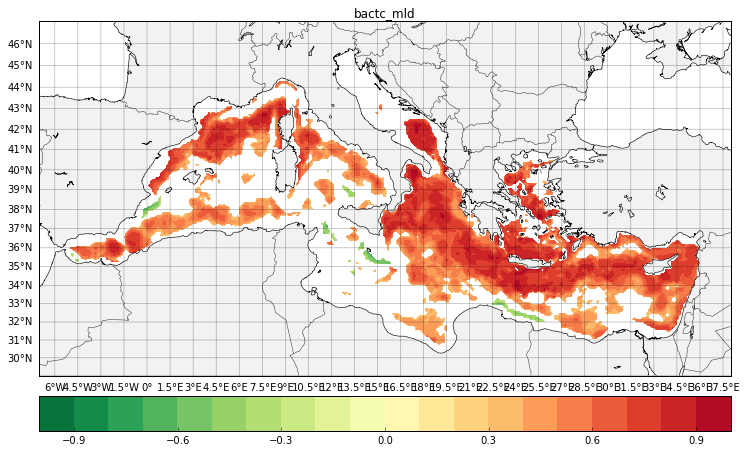

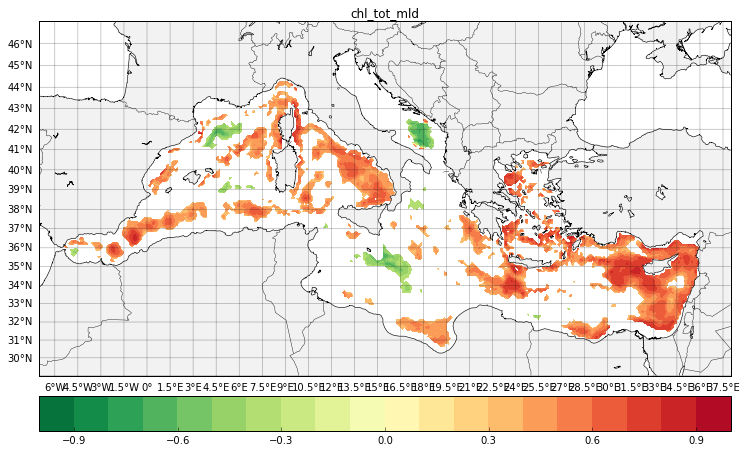

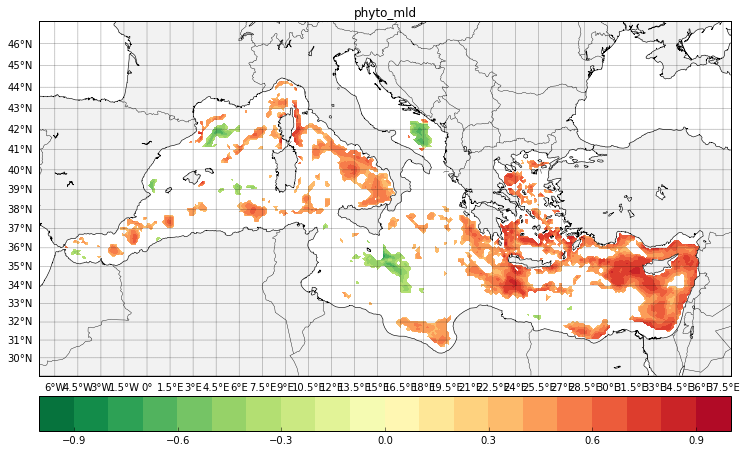

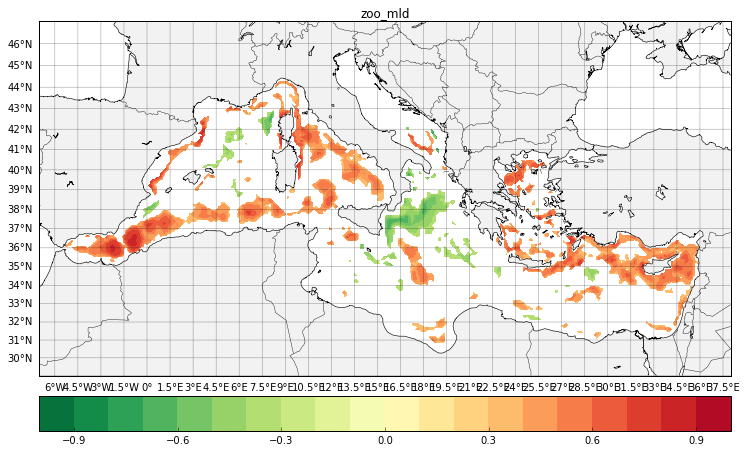

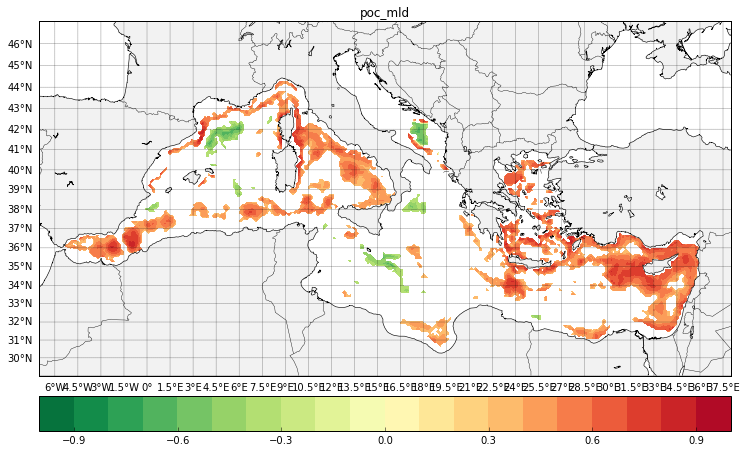

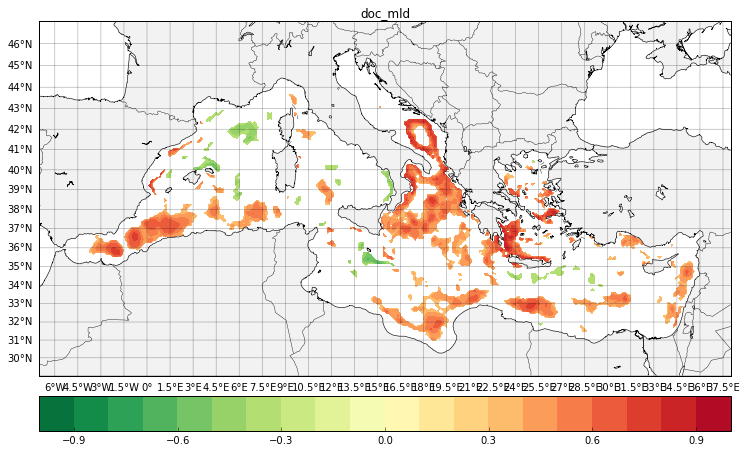

In [88]:
for phyvar in var_phy:
    for othervar in var_other:
        x1,x2,y1,y2 = -7, 38, 29, 47;
        m = Basemap(resolution='i',projection='merc', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=(x1+x2)/2);
                    # figure
        fig = plt.figure(figsize=(12,12));
        ax = fig.add_axes([0.1,0.1,0.8,0.8]);
        m.drawcountries(linewidth=0.4);
        m.drawcoastlines(linewidth=0.6);
        m.fillcontinents(color='0.95',lake_color='white');
        parallels = np.arange(0.,81,1);
        m.drawparallels(parallels,labels=[True,False,True,False],linewidth=0.4);
        meridians = np.arange(-6.,351.,1.5);
        m.drawmeridians(meridians,labels=[True,False,False,True],linewidth=0.4);

        # Creating corresponding variable names
        data_to_plot = np.ma.masked_where(bathy<200,vars()[othervar+'_'+phyvar])
        data_to_plot = np.ma.masked_where(lon_t<-5.5,data_to_plot)

        # doing a map # Données
        xd,yd = m(lon_t,lat_t);
        levels = np.arange(-1,1.1,0.1);
        #levels2 = np.arange(-1,1.1,0.2);
        #CS1 = m.contour(xd,yd,data_to_plot,levels=levels2,linewidths=0.2,colors='k');
        cs = m.contourf(xd,yd,data_to_plot,levels=levels,cmap=plt.cm.RdYlGn_r);# binary / jet / PiYG ,levels=levels
        plt.colorbar(cs, orientation='horizontal', pad = 0.03)
        plt.title(othervar+'_'+phyvar)
        plt.savefig('/home/dosa/THESE/CR_reunions/JULY_FIGS/IAV_CORR_MAPS/'+othervar+'_'+phyvar+'2.png',bbox_inches='tight',format='png')

print 'END of CELL'